<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data(y_hat)_multi_delta_(0)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_0'

In [4]:
os.listdir(base_path)

['data_multi_delta_0_n20.csv',
 'data_multi_delta_0_n30.csv',
 'data_multi_delta_0_n60.csv',
 'data_multi_delta_0_n120.csv',
 'data_multi_delta_0_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,61.875713,79.921078,-0.040994,151.755797,151.977164,-0.221368
1,0.0,1.0,68.663703,66.045349,-0.870040,143.839012,144.765011,-0.925998
2,0.0,2.0,21.071655,68.659935,-0.341856,99.389734,99.797053,-0.407319
3,0.0,3.0,43.844790,78.255402,0.272977,132.373169,132.259958,0.113211
4,0.0,4.0,37.606052,48.352160,-1.505562,94.452651,95.843575,-1.390925
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,46.884186,84.389786,-1.150052,140.123920,141.140847,-1.016927
29996,999.0,26.0,82.498172,54.958596,0.668731,148.125499,147.447212,0.678287
29997,999.0,27.0,39.545015,80.575288,-0.854199,129.266104,129.962280,-0.696176
29998,999.0,28.0,58.576661,46.412209,-0.420933,114.567937,114.897940,-0.330003


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,61.875713,79.921078,-0.040994,151.755797,151.977164,-0.221368
1,0.0,1.0,68.663703,66.045349,-0.870040,143.839012,144.765011,-0.925998
2,0.0,2.0,21.071655,68.659935,-0.341856,99.389734,99.797053,-0.407319
3,0.0,3.0,43.844790,78.255402,0.272977,132.373169,132.259958,0.113211
4,0.0,4.0,37.606052,48.352160,-1.505562,94.452651,95.843575,-1.390925
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,46.884186,84.389786,-1.150052,140.123920,141.140847,-1.016927
29996,999.0,26.0,82.498172,54.958596,0.668731,148.125499,147.447212,0.678287
29997,999.0,27.0,39.545015,80.575288,-0.854199,129.266104,129.962280,-0.696176
29998,999.0,28.0,58.576661,46.412209,-0.420933,114.567937,114.897940,-0.330003


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    61.875713  79.921078 -0.040994  151.755797  151.977164 -0.221368
      1.0    68.663703  66.045349 -0.870040  143.839012  144.765011 -0.925998
      2.0    21.071655  68.659935 -0.341856   99.389734   99.797053 -0.407319
      3.0    43.844790  78.255402  0.272977  132.373169  132.259958  0.113211
      4.0    37.606052  48.352160 -1.505562   94.452651   95.843575 -1.390925
...                ...        ...       ...         ...         ...       ...
999.0 25.0   46.884186  84.389786 -1.150052  140.123920  141.140847 -1.016927
      26.0   82.498172  54.958596  0.668731  148.125499  147.447212  0.678287
      27.0   39.545015  80.575288 -0.854199  129.266104  129.962280 -0.696176
      28.0   58.576661  46.412209 -0.420933  114.567937  114.897940 -0.330003
      29.0   32.560819  65.487980 -0.913084  107.135714  107.867740 -0.732026

[30000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    61.875713  79.921078 -0.040994  151.755797  151.977164 -0.221368
      1.0    68.663703  66.045349 -0.870040  143.839012  144.765011 -0.925998
      2.0    21.071655  68.659935 -0.341856   99.389734   99.797053 -0.407319
      3.0    43.844790  78.255402  0.272977  132.373169  132.259958  0.113211
      4.0    37.606052  48.352160 -1.505562   94.452651   95.843575 -1.390925
...                ...        ...       ...         ...         ...       ...
999.0 25.0   46.884186  84.389786 -1.150052  140.123920  141.140847 -1.016927
      26.0   82.498172  54.958596  0.668731  148.125499  147.447212  0.678287
      27.0   39.545015  80.575288 -0.854199  129.266104  129.962280 -0.696176
      28.0   58.576661  46.412209 -0.420933  114.567937  114.897940 -0.330003
      29.0   32.560819  65.487980 -0.913084  107.135714  107.867740 -0.732026

[30000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,61.875713,79.921078,-0.040994,151.755797,151.977164,-0.221368
1,0.0,1.0,68.663703,66.045349,-0.870040,143.839012,144.765011,-0.925998
2,0.0,2.0,21.071655,68.659935,-0.341856,99.389734,99.797053,-0.407319
3,0.0,3.0,43.844790,78.255402,0.272977,132.373169,132.259958,0.113211
4,0.0,4.0,37.606052,48.352160,-1.505562,94.452651,95.843575,-1.390925
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,46.884186,84.389786,-1.150052,140.123920,141.140847,-1.016927
29996,999.0,26.0,82.498172,54.958596,0.668731,148.125499,147.447212,0.678287
29997,999.0,27.0,39.545015,80.575288,-0.854199,129.266104,129.962280,-0.696176
29998,999.0,28.0,58.576661,46.412209,-0.420933,114.567937,114.897940,-0.330003


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    61.875713  79.921078 -0.040994  151.755797  151.977164 -0.221368
      1.0    68.663703  66.045349 -0.870040  143.839012  144.765011 -0.925998
      2.0    21.071655  68.659935 -0.341856   99.389734   99.797053 -0.407319
      3.0    43.844790  78.255402  0.272977  132.373169  132.259958  0.113211
      4.0    37.606052  48.352160 -1.505562   94.452651   95.843575 -1.390925
...                ...        ...       ...         ...         ...       ...
999.0 25.0   46.884186  84.389786 -1.150052  140.123920  141.140847 -1.016927
      26.0   82.498172  54.958596  0.668731  148.125499  147.447212  0.678287
      27.0   39.545015  80.575288 -0.854199  129.266104  129.962280 -0.696176
      28.0   58.576661  46.412209 -0.420933  114.567937  114.897940 -0.330003
      29.0   32.560819  65.487980 -0.913084  107.135714  107.867740 -0.732026

[30000 rows x 6 columns]

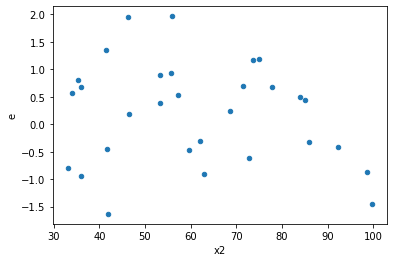

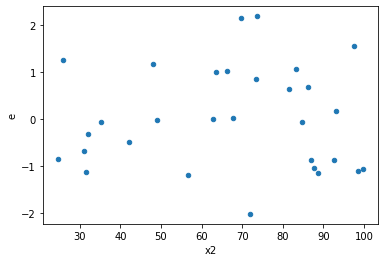

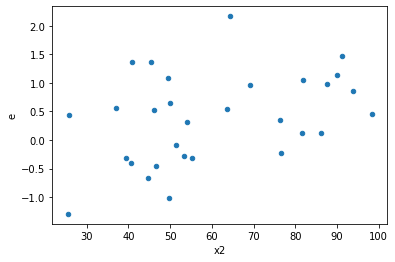

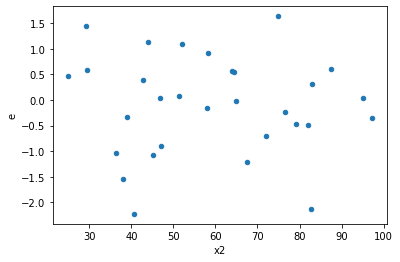

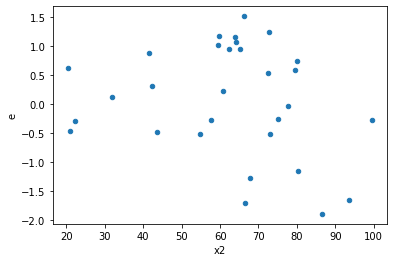

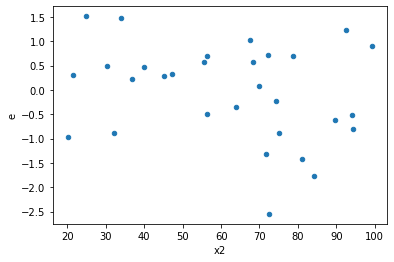

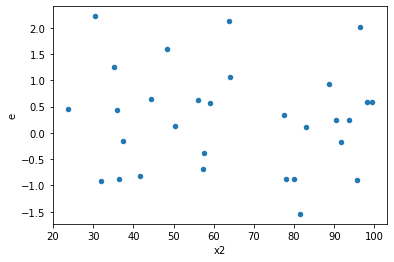

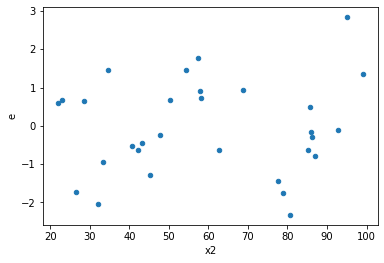

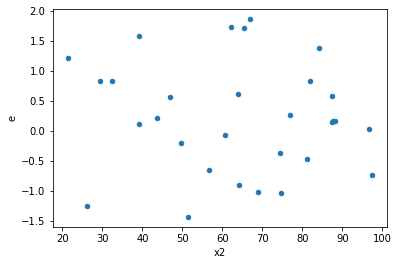

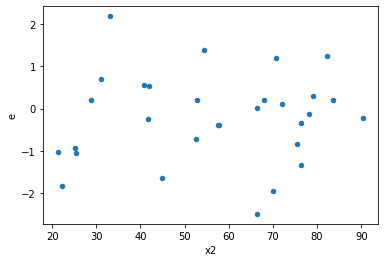

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,10.0,10.0,5.140102105247036,14.194686593079142,0.5140102105247035,1.4194686593079142,2.76155731976397,0.12466140793694258,0.9376692960315287,0.06233070396847129,Reject005=1 : Homoscedasticity
3.0,10.0,10.0,5.922008423263787,12.615951681002828,0.5922008423263787,1.2615951681002828,2.1303501750255562,0.24882809490424806,0.875585952547876,0.12441404745212403,Reject005=1 : Homoscedasticity
5.0,10.0,10.0,2.8047048893931743,13.295413799713167,0.2804704889393174,1.3295413799713167,4.740396699129997,0.02169709126075081,0.9891514543696246,0.010848545630375406,Reject005=0 : Heteroscedasticity
6.0,10.0,10.0,13.82657875341328,17.552716078383355,1.382657875341328,1.7552716078383355,1.2694909124970795,0.7132004616633696,0.6433997691683152,0.3566002308316848,Reject005=1 : Homoscedasticity
8.0,10.0,10.0,7.23717717007222,7.936359325637796,0.723717717007222,0.7936359325637796,1.096609788476216,0.8869227567758036,0.5565386216120982,0.4434613783879018,Reject005=1 : Homoscedasticity
9.0,10.0,10.0,5.149233076899636,13.301932335974316,0.5149233076899635,1.3301932335974316,2.58328417791945,0.1503961799892597,0.9248019100053702,0.07519808999462985,Reject005=1 : Homoscedasticity
10.0,10.0,10.0,3.5026058542572773,7.52439773166062,0.35026058542572774,0.7524397731660619,2.148228503219971,0.24375266386144157,0.8781236680692792,0.12187633193072078,Reject005=1 : Homoscedasticity
11.0,10.0,10.0,5.755952826178463,6.746272143426824,0.5755952826178463,0.6746272143426824,1.1720513261930017,0.806687209725184,0.596656395137408,0.403343604862592,Reject005=1 : Homoscedasticity
14.0,10.0,10.0,4.612472692083107,11.048608221064233,0.46124726920831066,1.1048608221064233,2.395376397572645,0.18446439455286878,0.9077678027235656,0.09223219727643439,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,10.0,10.0,5.140102105247036,14.194686593079142,0.5140102105247035,1.4194686593079142,2.76155731976397,0.12466140793694258,Reject005=1 : Homoscedasticity
1.0,10.0,10.0,6.67190100185983,3.71020998542393,0.667190100185983,0.371020998542393,0.5560948797636068,0.3687785399075244,Reject005=1 : Homoscedasticity
2.0,10.0,10.0,9.86827412662891,3.496548370319326,0.986827412662891,0.3496548370319326,0.35432217685199,0.11709444637100934,Reject005=1 : Homoscedasticity
3.0,10.0,10.0,5.922008423263787,12.615951681002828,0.5922008423263787,1.2615951681002828,2.1303501750255562,0.24882809490424806,Reject005=1 : Homoscedasticity
4.0,10.0,10.0,13.231635498853363,12.57721291675197,1.3231635498853362,1.257721291675197,0.9505410663588711,0.9376526524085245,Reject005=1 : Homoscedasticity
5.0,10.0,10.0,2.8047048893931743,13.295413799713167,0.2804704889393174,1.3295413799713167,4.740396699129997,0.02169709126075081,Reject005=0 : Heteroscedasticity
6.0,10.0,10.0,13.82657875341328,17.552716078383355,1.382657875341328,1.7552716078383355,1.2694909124970795,0.7132004616633696,Reject005=1 : Homoscedasticity
7.0,10.0,10.0,12.810658275165917,5.564310208698954,1.2810658275165916,0.5564310208698954,0.43435006142390353,0.2046022087782512,Reject005=1 : Homoscedasticity
8.0,10.0,10.0,7.23717717007222,7.936359325637796,0.723717717007222,0.7936359325637796,1.096609788476216,0.8869227567758036,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      929
Reject005=0 : Heteroscedasticity     71
Name: Result_test, dtype: int64